In [1]:
# Using these wrappers, the example program can be written in any of these languages:
# https://physionet.org/physiotools/wpg/wpg_10.htm#SWIG-wrappers-for-Java_002c-Perl_002c-Python_002c-and-other-languages
# https://github.com/MIT-LCP/wfdb-python/blob/master/demo.ipynb

In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
import pandas as pd

import wfdb

In [3]:
# C:\Users\MI2RL-KHJ\workspace_signal\physionet_raw\mit-bih-normal-sinus-rhythm-database-1.0.0

In [3]:
#root_path = os.getcwd() #'C:\\Users\\MI2RL-KHJ\\workspace_signal\\'
mit_db = 'physionet\\mit_normal\\physionet.org\\files\\nsrdb\\1.0.0'

In [4]:
# norm root_path
root_path = r'C:\Users\MI2RL-KHJ\workspace_signal\physionet_raw\mit-bih-normal-sinus-rhythm-database-1.0.0'

In [5]:
norm_ids = [file for file in os.listdir(root_path) if file.endswith('atr')]

In [6]:
norm_pt_ids = [ids.split('.atr')[0] for ids in norm_ids]
norm_pt_ids

['16265',
 '16272',
 '16273',
 '16420',
 '16483',
 '16539',
 '16773',
 '16786',
 '16795',
 '17052',
 '17453',
 '18177',
 '18184',
 '19088',
 '19090',
 '19093',
 '19140',
 '19830']

### Normal

#### 1) Overall processing

In [51]:
# norm_pt_ids 
# Using Pycharm

#### 2. Each processing to check

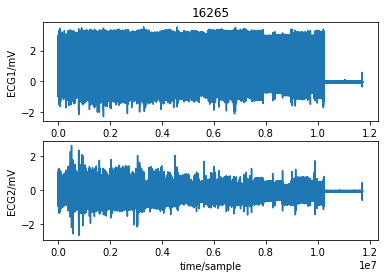

{'record_name': '16265',
 'n_sig': 2,
 'fs': 128,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 11730944,
 'base_time': datetime.time(8, 4),
 'base_date': None,
 'comments': ['32 M'],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': array([[-0.165, -0.325],
        [-0.155, -0.325],
        [-0.195, -0.305],
        ...,
        [-0.05 , -0.095],
        [-0.05 , -0.085],
        [-0.05 , -0.085]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['16265.dat', '16265.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-33, -65],
 'checksum': [15756, -21174],
 'block_size': [0, 0]}

In [7]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.

%matplotlib inline
record = wfdb.rdrecord(os.path.join(root_path, norm_pt_ids[0]))
wfdb.plot_wfdb(record=record, title=norm_pt_ids[0])#'Record a103l from PhysioNet Challenge 2015') 
display(record.__dict__)

In [8]:
import pandas as pd 

df = pd.DataFrame(record.p_signal, columns=['ECG1', 'ECG2'])

In [9]:
# wfdb.rdsamp(file[:-4])[1][:, 1]

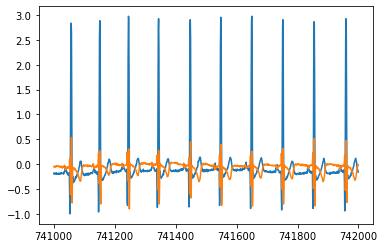

In [10]:
%matplotlib inline
plt.plot(df['ECG1'][741000:742000])
plt.plot(df['ECG2'][741000:742000])

#### 3. Plotting to check data

In [11]:
new_workplace_path = r'C:/Users/MI2RL-KHJ/workspace_signal/20211109/'

In [14]:
overall_ecg1 = os.path.join(new_workplace_path, 'ECGs_1110.csv')
overall_ecg2 = os.path.join(new_workplace_path, 'ECGs2_1114.csv')

In [15]:
ecg_df1 = pd.read_csv(overall_ecg1)
ecg_df2 = pd.read_csv(overall_ecg2)

In [16]:
ecg_df1.head()

,ECG1,ECG2,Participant,Sample,Sampling_Rate,Database
0,-0.165,-0.325,MIT-Normal_00,0,128,MIT-Normal
1,-0.155,-0.325,MIT-Normal_00,1,128,MIT-Normal
2,-0.195,-0.305,MIT-Normal_00,2,128,MIT-Normal
3,-0.205,-0.305,MIT-Normal_00,3,128,MIT-Normal
4,-0.185,-0.295,MIT-Normal_00,4,128,MIT-Normal


In [17]:
ecg_df2.head()

,ECG1,ECG2,Participant,Sample,Sampling_Rate,Database
0,-0.165,-0.325,MIT-Normal_00,0,128,MIT-Normal
1,-0.155,-0.325,MIT-Normal_00,1,128,MIT-Normal
2,-0.195,-0.305,MIT-Normal_00,2,128,MIT-Normal
3,-0.205,-0.305,MIT-Normal_00,3,128,MIT-Normal
4,-0.185,-0.295,MIT-Normal_00,4,128,MIT-Normal


In [50]:
overall_ecg1 = os.path.join(new_workplace_path, 'ECGs_1110.csv')
ecg_df1 = pd.read_csv(overall_ecg1)

In [18]:
ecg_df1.head()

,ECG1,ECG2,Participant,Sample,Sampling_Rate,Database
0,-0.165,-0.325,MIT-Normal_00,0,128,MIT-Normal
1,-0.155,-0.325,MIT-Normal_00,1,128,MIT-Normal
2,-0.195,-0.305,MIT-Normal_00,2,128,MIT-Normal
3,-0.205,-0.305,MIT-Normal_00,3,128,MIT-Normal
4,-0.185,-0.295,MIT-Normal_00,4,128,MIT-Normal


In [20]:
ids = ecg_df1['Participant'].unique()

In [21]:
ids

array(['MIT-Normal_00', 'MIT-Normal_01', 'MIT-Normal_02', 'MIT-Normal_03',
       'MIT-Normal_04', 'MIT-Normal_05', 'MIT-Normal_06', 'MIT-Normal_07',
       'MIT-Normal_08', 'MIT-Normal_09', 'MIT-Normal_10', 'MIT-Normal_11',
       'MIT-Normal_12', 'MIT-Normal_13', 'MIT-Normal_14', 'MIT-Normal_15',
       'MIT-Normal_16', 'MIT-Normal_17'], dtype=object)

In [23]:
ecg1_over_df = [ecg_df1[ecg_df1['Participant']==i]['ECG1'] for i in ids]
ecg2_over_df = [ecg_df1[ecg_df1['Participant']==i]['ECG2'] for i in ids]

In [22]:
import numpy as np
from biosppy.signals import ecg

In [25]:
### path for load json 
ecg1_folder = os.path.join(new_workplace_path, 'ecg1')
ecg2_folder = os.path.join(new_workplace_path, 'ecg2')

##### 3-1. ECG1, ECG2 확인

In [26]:
norm_files = [i for i in os.listdir(ecg1_folder) if i.endswith('json')]
norm_ids = [i.split('.json')[0] for i in norm_files]

In [27]:
norm_files

['MIT-Normal_00.json',
 'MIT-Normal_01.json',
 'MIT-Normal_02.json',
 'MIT-Normal_03.json',
 'MIT-Normal_04.json',
 'MIT-Normal_05.json',
 'MIT-Normal_06.json',
 'MIT-Normal_07.json',
 'MIT-Normal_08.json',
 'MIT-Normal_09.json',
 'MIT-Normal_10.json',
 'MIT-Normal_11.json',
 'MIT-Normal_12.json',
 'MIT-Normal_13.json',
 'MIT-Normal_14.json',
 'MIT-Normal_15.json',
 'MIT-Normal_16.json',
 'MIT-Normal_17.json']

In [46]:
import json

def file_read(ecg_folder, file_num, channel):

    subject = norm_files[file_num]
    with open(os.path.join(ecg_folder, subject), 'r') as f:
        tmp_norm = json.load(f)
    print(tmp_norm.keys())

    # find max value as y-vals between -+ 10 points 
    # corrected r-peaks 
    # y-values 
    yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
    yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
    yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

    # x-values 
    xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
    xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
    xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

    %matplotlib auto
#     plt.plot(tmp_norm['rpeaks'], yvals, "rx",  label='R-peak')
#     plt.plot(xvals_rpeaks, yvals_rpeaks, "g+",  label='Corrected R-peak')      
#     plt.ylabel('ECG output Voltage (mV)')
#     plt.xlabel('Time(s)')
#     plt.legend()
#     plt.title(subject+': ' + channel)
              
    plt.plot(tmp_norm['filtered'])
    plt.plot(tmp_norm['rpeaks'], yvals, "rx")
    plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")   
    plt.title(subject+': ' + channel)

In [31]:
# ecg_folder1 
file_read(ecg1_folder, 0, ECG)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


In [32]:
# ecg_folder2 
file_read(ecg2_folder, 0)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


In [48]:
# ecg_folder1 
file_read(ecg1_folder, 3, 'ECG1')

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


In [36]:
# ecg_folder2
file_read(ecg2_folder, 3)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


In [49]:
# ecg_folder1 
file_read(ecg1_folder, 4, 'ECG1')

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


In [50]:
# ecg_folder2
file_read(ecg2_folder, 4, 'ECG2')

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


In [51]:
# ecg_folder1 
file_read(ecg1_folder, 6, 'ECG1')

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


In [52]:
# ecg_folder1 
file_read(ecg1_folder, 15, 'ECG1')

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


In [53]:
# ecg_folder2
file_read(ecg2_folder, 15, 'ECG2')

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


#### 4. MinMax Normalziation

In [55]:
## Normalization: Min-Max

# from sklearn.preprocessing import minmax_scale
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

#normalized_df = {}
#for i in range(3,18):
with open(os.path.join(ecg1_folder,norm_files[0]), 'r') as f:
    tmp_norm = json.load(f)

In [56]:
tmp_norm

{'ts': [0.0,
  0.0078125,
  0.015625,
  0.0234375,
  0.03125,
  0.0390625,
  0.046875,
  0.0546875,
  0.0625,
  0.0703125,
  0.078125,
  0.0859375,
  0.09375,
  0.1015625,
  0.109375,
  0.1171875,
  0.125,
  0.1328125,
  0.140625,
  0.1484375,
  0.15625,
  0.1640625,
  0.171875,
  0.1796875,
  0.1875,
  0.1953125,
  0.203125,
  0.2109375,
  0.21875,
  0.2265625,
  0.234375,
  0.2421875,
  0.25,
  0.2578125,
  0.265625,
  0.2734375,
  0.28125,
  0.2890625,
  0.296875,
  0.3046875,
  0.3125,
  0.3203125,
  0.328125,
  0.3359375,
  0.34375,
  0.3515625,
  0.359375,
  0.3671875,
  0.375,
  0.3828125,
  0.390625,
  0.3984375,
  0.40625,
  0.4140625,
  0.421875,
  0.4296875,
  0.4375,
  0.4453125,
  0.453125,
  0.4609375,
  0.46875,
  0.4765625,
  0.484375,
  0.4921875,
  0.5,
  0.5078125,
  0.515625,
  0.5234375,
  0.53125,
  0.5390625,
  0.546875,
  0.5546875,
  0.5625,
  0.5703125,
  0.578125,
  0.5859375,
  0.59375,
  0.6015625,
  0.609375,
  0.6171875,
  0.625,
  0.6328125,
  0.640625,


In [59]:
subject = ids[0]

# Min-max Normalization
y = np.array(tmp_norm['filtered']).reshape(-1,1)
y_scaled = min_max_scaler.fit_transform(y)
# normalized_df[ids[i]] = y_scal
normalized_df[ids[0]] = y_scaled

NameError: name 'normalized_df' is not defined

In [60]:
y_scaled

array([[0.36734694],
       [0.36904762],
       [0.3622449 ],
       ...,
       [0.38690476],
       [0.38690476],
       [0.38690476]])

In [61]:
# find max value as y-vals between -+ 10 points
# y-values 
# corrected r-peaks 
yvals = [y_scaled[i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(y_scaled[i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(y_scaled[i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

In [62]:
# plotting
# %matplotlib auto
plt.figure()
plt.plot(y_scaled)
plt.plot(tmp_norm['rpeaks'], yvals, "rx",  label='R-peak')
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+",  label='Corrected R-peak',)
plt.title(subject)
plt.show()

In [96]:
import json
# from sklearn.preprocessing import minmax_scale
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

def min_max(ecg_folder, file_num, channel):

    subject = norm_files[file_num]
    with open(os.path.join(ecg_folder, subject), 'r') as f:
        tmp_norm = json.load(f)

    # Min-max Normalization
    y = np.array(tmp_norm['filtered']).reshape(-1,1)
    y_scaled = min_max_scaler.fit_transform(y)
    y_scaled_df = pd.DataFrame(y_scaled, columns=['y_minmax'])

    # find max value as y-vals between -+ 10 points
    # y-values 
    # corrected r-peaks 
    yvals = [y_scaled[i] for i in tmp_norm['rpeaks']]
    yvals_argmax_range = [np.argmax(y_scaled[i-10:i+10]) for i in tmp_norm['rpeaks']]
    yvals_rpeaks = [np.max(y_scaled[i-10:i+10]) for i in tmp_norm['rpeaks']]  

    # x-values 
    xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
    xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
    xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))] 

    
    # Save values
    y_scaled_df.to_csv(os.path.join(ecg_folder, 'y_norm_'+ subject +'.csv'))

    yvals_df = pd.DataFrame(yvals, columns=['y_rpeaks'])
    yvals_rpeaks_df = pd.DataFrame(yvals_rpeaks, columns=['y_corrected_rpeaks'])
    xvals_df = pd.DataFrame(xvals, columns=['x_rpeaks'])
    xvals_rpeaks_df = pd.DataFrame(xvals_rpeaks, columns=['x_corrected_rpeaks'])

    norm_rpeaks_df = pd.concat([yvals_df, xvals_df, yvals_rpeaks_df, xvals_rpeaks_df], axis=1)    
    norm_rpeaks_df.to_csv(os.path.join(ecg_folder, 'y_norm_rpeak_'+ subject +'.csv'))    

    
    %matplotlib auto
    plt.figure()
    plt.plot(y_scaled)    
    plt.plot(tmp_norm['rpeaks'], yvals, "rx",  label='R-peak')
    plt.plot(xvals_rpeaks, yvals_rpeaks, "g+",  label='Corrected R-peak')      
    plt.ylabel('Normalized ECG')
    plt.xlabel('Time(s)')
    plt.legend()
    plt.title(subject+': Min-max Normalized ' + channel)
              
#     plt.plot(tmp_norm['filtered'])
#     plt.plot(tmp_norm['rpeaks'], yvals, "rx")
#     plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")   
#     plt.title(subject+': ' + channel)


In [112]:
# min_max(ecg1_folder, 0, 'ECG1')
# min_max(ecg1_folder, 1, 'ECG1')
# min_max(ecg1_folder, 2, 'ECG1')
# min_max(ecg1_folder, 3, 'ECG1')
# min_max(ecg1_folder, 4, 'ECG1')
# min_max(ecg1_folder, 5, 'ECG1')
# min_max(ecg1_folder, 6, 'ECG1')
# min_max(ecg1_folder, 7, 'ECG1')
# min_max(ecg1_folder, 8, 'ECG1')
# min_max(ecg1_folder, 9, 'ECG1')
# min_max(ecg1_folder, 10, 'ECG1')
# min_max(ecg1_folder, 11, 'ECG1')
# min_max(ecg1_folder, 12, 'ECG1')
# min_max(ecg1_folder, 13, 'ECG1')
# min_max(ecg1_folder, 14, 'ECG1')
# min_max(ecg1_folder, 15, 'ECG1')
# min_max(ecg1_folder, 16, 'ECG1')
min_max(ecg1_folder, 17, 'ECG1')

Using matplotlib backend: Qt5Agg


##### Etc....

In [100]:
# norm root_path
root_path = r'C:\Users\MI2RL-KHJ\workspace_signal\physionet_raw\mit-bih-normal-sinus-rhythm-database-1.0.0'
saved_path = r'C:\Users\MI2RL-KHJ\workspace_signal\20211109'

#processing(root_path)
overall_ecg = os.path.join(saved_path, 'ECGs.csv')
ecg_df = pd.read_csv(overall_ecg)
ids = ecg_df['Participant'].unique()

In [101]:
ids

array(['MIT-Normal_00', 'MIT-Normal_01', 'MIT-Normal_02', 'MIT-Normal_03',
       'MIT-Normal_04', 'MIT-Normal_05', 'MIT-Normal_06', 'MIT-Normal_07',
       'MIT-Normal_08', 'MIT-Normal_09', 'MIT-Normal_10', 'MIT-Normal_11',
       'MIT-Normal_12', 'MIT-Normal_13', 'MIT-Normal_14', 'MIT-Normal_15',
       'MIT-Normal_16', 'MIT-Normal_17'], dtype=object)

In [136]:
# for i in range(len(ids)):
#     with open(os.path.join(ecg1_folder,norm_files[i]), 'r') as f:
#         tmp_norm = json.load(f)
#         print(norm_files[i], ':', len(tmp_norm['filtered']))
# '''
# MIT-Normal_00.json : 11730944
# MIT-Normal_01.json : 11520000
# MIT-Normal_02.json : 11354112
# MIT-Normal_03.json : 11051008
# MIT-Normal_04.json : 11960320
# MIT-Normal_05.json : 11327488
# MIT-Normal_06.json : 11046912
# MIT-Normal_07.json : 11284480
# MIT-Normal_08.json : 10866688
# MIT-Normal_09.json : 10659840
# MIT-Normal_10.json : 11235328
# MIT-Normal_11.json : 11960320
# MIT-Normal_12.json : 10942464
# MIT-Normal_13.json : 10967040
# MIT-Normal_14.json : 11143168
# MIT-Normal_15.json : 10705920
# MIT-Normal_16.json : 11139072
# MIT-Normal_17.json : 10701824
# '''        

MIT-Normal_00.json : 11730944
MIT-Normal_01.json : 11520000
MIT-Normal_02.json : 11354112
MIT-Normal_03.json : 11051008
MIT-Normal_04.json : 11960320
MIT-Normal_05.json : 11327488
MIT-Normal_06.json : 11046912
MIT-Normal_07.json : 11284480
MIT-Normal_08.json : 10866688
MIT-Normal_09.json : 10659840
MIT-Normal_10.json : 11235328
MIT-Normal_11.json : 11960320
MIT-Normal_12.json : 10942464
MIT-Normal_13.json : 10967040
MIT-Normal_14.json : 11143168
MIT-Normal_15.json : 10705920
MIT-Normal_16.json : 11139072
MIT-Normal_17.json : 10701824


In [137]:
# for i in range(len(ids)):
#     with open(os.path.join(ecg1_folder,norm_files[i]), 'r') as f:
#         tmp_norm = json.load(f)
#         print(norm_files[i], ':', len(tmp_norm['rpeaks']))
        
# '''
# MIT-Normal_00.json : 100483
# MIT-Normal_01.json : 92150
# MIT-Normal_02.json : 89841
# MIT-Normal_03.json : 102097
# MIT-Normal_04.json : 104340
# MIT-Normal_05.json : 108289
# MIT-Normal_06.json : 81987
# MIT-Normal_07.json : 101630
# MIT-Normal_08.json : 86894
# MIT-Normal_09.json : 87561
# MIT-Normal_10.json : 100676
# MIT-Normal_11.json : 116207
# MIT-Normal_12.json : 102530
# MIT-Normal_13.json : 99652
# MIT-Normal_14.json : 81608
# MIT-Normal_15.json : 29767
# MIT-Normal_16.json : 96813
# MIT-Normal_17.json : 110364
# '''        

MIT-Normal_00.json : 100483
MIT-Normal_01.json : 92150
MIT-Normal_02.json : 89841
MIT-Normal_03.json : 102097
MIT-Normal_04.json : 104340
MIT-Normal_05.json : 108289
MIT-Normal_06.json : 81987
MIT-Normal_07.json : 101630
MIT-Normal_08.json : 86894
MIT-Normal_09.json : 87561
MIT-Normal_10.json : 100676
MIT-Normal_11.json : 116207
MIT-Normal_12.json : 102530
MIT-Normal_13.json : 99652
MIT-Normal_14.json : 81608
MIT-Normal_15.json : 29767
MIT-Normal_16.json : 96813
MIT-Normal_17.json : 110364


In [148]:
x = np.array(tmp_norm['filtered']).reshape(-1,1)

In [149]:
x

array([[-0.165],
       [-0.155],
       [-0.195],
       ...,
       [-0.05 ],
       [-0.05 ],
       [-0.05 ]])

In [154]:
y_scaled = min_max_scaler.fit_transform(x)

In [153]:
x[3]

array([-0.205])

In [159]:
normalized_df

{'MIT-Normal_00': array([[0.36734694],
        [0.36904762],
        [0.3622449 ],
        ...,
        [0.38690476],
        [0.38690476],
        [0.38690476]])}

In [153]:
def flatten(t):
    return [item for sublist in t for item in sublist]

flat_tmp = flatten(tmp_norm['templates'])

In [13]:
# atr_list =[file for file in os.listdir(mit_db) if file.endswith('.atr')]
# len(atr_list) #18

In [73]:
plt.plot(df['ECG2'][:5000], label='ECG2', color='#ff7f0e')
plt.ylabel('ECG output Voltage (mV)')
plt.xlabel('Time(s)')
plt.legend()

In [74]:
plt.plot(df['(-1)*ECG2'][:5000], label='(-1)*ECG2', color='#ff7f0e')
plt.ylabel('ECG output Voltage (mV)')
plt.xlabel('Time(s)')
plt.legend()

In [82]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord(os.path.join(normal_path,'16265'))
wfdb.plot_wfdb(record=record, title='Record 16265')#'Record a103l from PhysioNet Challenge 2015') 
display(record.__dict__)

{'record_name': '16265',
 'n_sig': 2,
 'fs': 128,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 11730944,
 'base_time': datetime.time(8, 4),
 'base_date': None,
 'comments': ['32 M'],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': array([[-0.165, -0.325],
        [-0.155, -0.325],
        [-0.195, -0.305],
        ...,
        [-0.05 , -0.095],
        [-0.05 , -0.085],
        [-0.05 , -0.085]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['16265.dat', '16265.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-33, -65],
 'checksum': [15756, -21174],
 'block_size': [0, 0]}

In [86]:
import pandas as pd 

df = pd.DataFrame(record.p_signal, columns=['ECG1', 'ECG2'])

In [91]:
plt.plot(df['ECG1'][:5000], label='ECG1')
plt.ylabel('ECG output Voltage (mV)')
plt.xlabel('Time(s)')
plt.legend()

In [92]:
plt.plot(df['ECG2'][:5000], label='ECG2', color='#ff7f0e')
plt.ylabel('ECG output Voltage (mV)')
plt.xlabel('Time(s)')
plt.legend()

In [95]:
plt.plot(df['(-1)*ECG2'][:5000], label='(-1)*ECG2', color='#ff7f0e')
plt.ylabel('ECG output Voltage (mV)')
plt.xlabel('Time(s)')
plt.legend()

In [100]:
tmp = df['ECG1'].values

In [101]:
tmp

array([-0.165, -0.155, -0.195, ..., -0.05 , -0.05 , -0.05 ])

### Arrhythmia Dataset

In [9]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord(os.path.join(root_path, mit_db,'100'))
wfdb.plot_wfdb(record=record, title='Record 100')#'Record a103l from PhysioNet Challenge 2015') 
display(record.__dict__)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\MI2RL-KHJ\\workspace_signal\\physionet\\mit_normal\\physionet.org\\files\\nsrdb\\1.0.0\\100.hea'